# PREDICTION OF HATREDNESS IN ELECTION CANDIDTATES

In [49]:
!pip install textstat

# Importing All Libraries and Packages Required

In [1]:
import pandas as panda
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Loading the Dataset(Lizz_Truss(One member))

In [2]:
dataset = panda.read_csv('F:/Mini Project/Lizz_Truss_Fin.csv')
df1=dataset.head(699)
df1

,S.No,Commentor Name,Comment,Dislike,Insulting,Neutral,Supporting,Meaningless,Class
0,1,Steven Maddock,First and last speech,NaN,NaN,1.0,NaN,NaN,1
1,2,max jelley,It would be soporificƒ??but those reforms made...,NaN,1.0,NaN,NaN,NaN,0
2,3,Iceman naz,Talk about reading from a script,NaN,1.0,NaN,NaN,NaN,0
3,4,Billy Leen,This didnt age well,NaN,1.0,NaN,NaN,NaN,0
4,5,Selin YŽñlmaz,look my sweetheart .,NaN,NaN,NaN,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...
694,695,sean smith ronsen,She will do wonderful as prime Minister may Go...,NaN,NaN,NaN,1.0,NaN,1
695,696,Liam Hackett,If he existed he wouldn&#39;t be blessing her....,NaN,NaN,1.0,NaN,NaN,1
696,697,iiBus,Did she?,NaN,NaN,1.0,NaN,NaN,1
697,698,S L,Oh dear. Is anyone else hearing Jen from IT Cr...,NaN,NaN,NaN,NaN,1.0,1


In [3]:
df2 = dataset.head(699).fillna(0)
df2

,S.No,Commentor Name,Comment,Dislike,Insulting,Neutral,Supporting,Meaningless,Class
0,1,Steven Maddock,First and last speech,0.0,0.0,1.0,0.0,0.0,1
1,2,max jelley,It would be soporificƒ??but those reforms made...,0.0,1.0,0.0,0.0,0.0,0
2,3,Iceman naz,Talk about reading from a script,0.0,1.0,0.0,0.0,0.0,0
3,4,Billy Leen,This didnt age well,0.0,1.0,0.0,0.0,0.0,0
4,5,Selin YŽñlmaz,look my sweetheart .,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
694,695,sean smith ronsen,She will do wonderful as prime Minister may Go...,0.0,0.0,0.0,1.0,0.0,1
695,696,Liam Hackett,If he existed he wouldn&#39;t be blessing her....,0.0,0.0,1.0,0.0,0.0,1
696,697,iiBus,Did she?,0.0,0.0,1.0,0.0,0.0,1
697,698,S L,Oh dear. Is anyone else hearing Jen from IT Cr...,0.0,0.0,0.0,0.0,1.0,1


In [4]:
df2['CommentLength'] = df2['Comment'].apply(len)
print(df2.head())

   S.No  Commentor Name                                            Comment  \
0     1  Steven Maddock                              First and last speech   
1     2      max jelley  It would be soporificƒ??but those reforms made...   
2     3      Iceman naz                   Talk about reading from a script   
3     4      Billy Leen                                This didnt age well   
4     5   Selin YŽñlmaz                               look my sweetheart .   

   Dislike  Insulting  Neutral  Supporting  Meaningless  Class  CommentLength  
0      0.0        0.0      1.0         0.0          0.0      1             21  
1      0.0        1.0      0.0         0.0          0.0      0             82  
2      0.0        1.0      0.0         0.0          0.0      0             32  
3      0.0        1.0      0.0         0.0          0.0      0             19  
4      0.0        0.0      0.0         1.0          0.0      1             20  


In [5]:
df2

,S.No,Commentor Name,Comment,Dislike,Insulting,Neutral,Supporting,Meaningless,Class,CommentLength
0,1,Steven Maddock,First and last speech,0.0,0.0,1.0,0.0,0.0,1,21
1,2,max jelley,It would be soporificƒ??but those reforms made...,0.0,1.0,0.0,0.0,0.0,0,82
2,3,Iceman naz,Talk about reading from a script,0.0,1.0,0.0,0.0,0.0,0,32
3,4,Billy Leen,This didnt age well,0.0,1.0,0.0,0.0,0.0,0,19
4,5,Selin YŽñlmaz,look my sweetheart .,0.0,0.0,0.0,1.0,0.0,1,20
...,...,...,...,...,...,...,...,...,...,...
694,695,sean smith ronsen,She will do wonderful as prime Minister may Go...,0.0,0.0,0.0,1.0,0.0,1,58
695,696,Liam Hackett,If he existed he wouldn&#39;t be blessing her....,0.0,0.0,1.0,0.0,0.0,1,123
696,697,iiBus,Did she?,0.0,0.0,1.0,0.0,0.0,1,8
697,698,S L,Oh dear. Is anyone else hearing Jen from IT Cr...,0.0,0.0,0.0,0.0,1.0,1,57


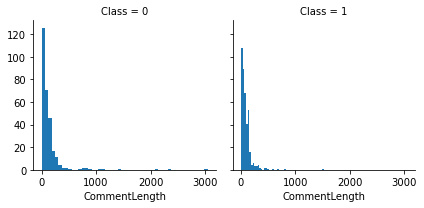

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=df2, col='Class')
graph.map(plt.hist, 'CommentLength', bins=50)

<AxesSubplot:xlabel='Class', ylabel='CommentLength'>

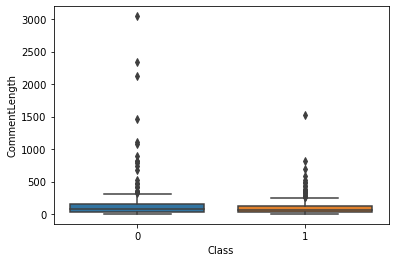

In [7]:
sns.boxplot(x='Class', y='CommentLength', data=df2)

<AxesSubplot:>

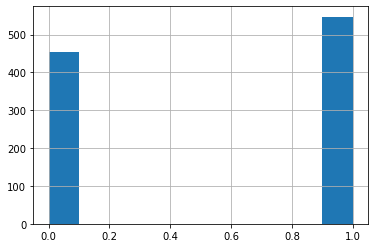

In [8]:
dataset['Class'].hist()

# Data Pre-Processing

In [9]:
comment=df2.Comment

In [10]:
## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in YouTube such as reply etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(comment):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    comment_space = comment.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    comment_name = comment_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    comments = comment_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = comments.str.replace("[^a-zA-Z]", " ")
    # remove whitespace with a single space
    newcomment=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newcomment=newcomment.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newcomment=newcomment.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    comment_lower = newcomment.str.lower()
    
    # tokenizing
    tokenized_comment = comment_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_comment=  tokenized_comment.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the commens
    tokenized_comment = tokenized_comment.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_comment)):
        tokenized_comment[i] = ' '.join(tokenized_comment[i])
        comments_p= tokenized_comment
    
    return comments_p

processed_comments = preprocess(comment)   

df2['processed_comments'] = processed_comments
print(df2[["Comment","processed_comments"]].head(10))

                                             Comment  \
0                              First and last speech   
1  It would be soporificƒ??but those reforms made...   
2                   Talk about reading from a script   
3                                This didnt age well   
4                               look my sweetheart .   
5        Say what you want but that podium goes hard   
6                                               ????   
7               Whay you dont talk and drogs Kellers   
8  Watching your video never get me bored. But I ...   
9  It&#39;s a good feeling when you&#39;re Invest...   

                                  processed_comments  
0                                  first last speech  
1  would soporif reform made februari pretti cold...  
2                                   talk read script  
3                                     didnt age well  
4                                    look sweetheart  
5                           say want podium goe hard 

In [11]:
#TF-IDF Features-F1
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df2['processed_comments'] )
tfidf

<699x331 sparse matrix of type '<class 'numpy.float64'>'
	with 4643 stored elements in Compressed Sparse Row format>

# Logistic Regression 

In [12]:
X1 = tfidf
y1= df2['Class'].astype(int)
X_train_tfidf1, X_test_tfidf1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42, test_size=0.3)
model1 = LogisticRegression().fit(X_train_tfidf1,y_train1)
y_preds1 = model1.predict(X_test_tfidf1)
report1 = classification_report( y_test1, y_preds1 )
print(report1)
acc=accuracy_score(y_test1,y_preds1)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.68      0.36      0.47        88
           1       0.66      0.88      0.75       122

    accuracy                           0.66       210
   macro avg       0.67      0.62      0.61       210
weighted avg       0.67      0.66      0.63       210

Logistic Regression, Accuracy Score: 0.6619047619047619


# Random Forest

In [13]:
X_train_tfidf2, X_test_tfidf2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.3)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf2,y_train2)
y_preds2 = rf.predict(X_test_tfidf2)
acc1=accuracy_score(y_test2,y_preds2)
report2 = classification_report( y_test2, y_preds2 )
print(report2)
print("Random Forest, Accuracy Score:",acc1)



              precision    recall  f1-score   support

           0       0.62      0.43      0.51        94
           1       0.63      0.79      0.70       116

    accuracy                           0.63       210
   macro avg       0.63      0.61      0.60       210
weighted avg       0.63      0.63      0.61       210

Random Forest, Accuracy Score: 0.6285714285714286


# Naive Bayes

In [14]:
X_train_tfidf3, X_test_tfidf3, y_train3, y_test3 = train_test_split(X1.toarray(), y1, random_state=42, test_size=0.3)
nb=GaussianNB()
nb.fit(X_train_tfidf3,y_train3)
y_preds3 = nb.predict(X_test_tfidf3)
acc2=accuracy_score(y_test3,y_preds3)
report3 = classification_report( y_test3, y_preds3 )
print(report3)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.65      0.58      0.61        88
           1       0.72      0.77      0.74       122

    accuracy                           0.69       210
   macro avg       0.68      0.68      0.68       210
weighted avg       0.69      0.69      0.69       210

Naive Bayes, Accuracy Score: 0.6904761904761905


# Support Vector Machine

In [15]:
support =LinearSVC(random_state=20)
support.fit(X_train_tfidf1,y_train1)
y_preds4 = support.predict(X_test_tfidf1)
acc3=accuracy_score(y_test1,y_preds4)
report4 = classification_report( y_test1, y_preds4 )
print(report4)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        88
           1       0.69      0.82      0.75       122

    accuracy                           0.69       210
   macro avg       0.68      0.66      0.66       210
weighted avg       0.68      0.69      0.68       210

SVM, Accuracy Score: 0.6857142857142857


# LSTM

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
X = df2['Comment'].values
y = df2['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1
max_len = 100
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, y_test, verbose=0)
print(f' Test accuracy: {score[1]}')
acc4 = score[1]

Epoch 1/10
18/18 [==============================] - 5s 96ms/step - loss: 0.6861 - accuracy: 0.5725
Epoch 2/10
18/18 [==============================] - 2s 102ms/step - loss: 0.6774 - accuracy: 0.5850
Epoch 3/10
18/18 [==============================] - 2s 94ms/step - loss: 0.6782 - accuracy: 0.5850
Epoch 4/10
18/18 [==============================] - 2s 88ms/step - loss: 0.6770 - accuracy: 0.5921
Epoch 5/10
18/18 [==============================] - 2s 92ms/step - loss: 0.6764 - accuracy: 0.6011
Epoch 6/10
18/18 [==============================] - 2s 88ms/step - loss: 0.6760 - accuracy: 0.6011
Epoch 7/10
18/18 [==============================] - 2s 97ms/step - loss: 0.6746 - accuracy: 0.6011
Epoch 8/10
18/18 [==============================] - 2s 93ms/step - loss: 0.6739 - accuracy: 0.6011
Epoch 9/10
18/18 [==============================] - 2s 96ms/step - loss: 0.6695 - accuracy: 0.6029
Epoch 10/10
18/18 [==============================] - 2s 107ms/step - loss: 0.6673 - accuracy: 0.6047
 Test a

# Comparision 

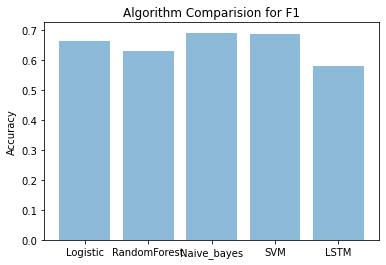

In [17]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM', 'LSTM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3,acc4]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()

# Class Labels for Naive Bayes and LSTM

In [49]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from collections import Counter

X_train_tfidf3, X_test_tfidf3, y_train3, y_test3 = train_test_split(X1.toarray(), y1, random_state=42, test_size=0.3)
nb=GaussianNB()
nb.fit(X_train_tfidf3,y_train3)
y_preds3 = nb.predict(X_test_tfidf3)
acc2=accuracy_score(y_test3,y_preds3)
report3 = classification_report( y_test3, y_preds3 )

y_preds3 = nb.predict(X_test_tfidf3)
# Converting the predicted class frequency to integers
y_preds3 = [int(round(x)) for x in y_preds3]

# Calculating individual class frequency
class_freq1 = Counter(y_preds3)
print(f"Class frequency: {class_freq1}")


Class frequency: Counter({1: 131, 0: 79})


In [50]:

class_freq1["Hatred"] = class_freq1.pop(0)
class_freq1["Non-Hatred"] = class_freq1.pop(1)

class_freq1

Counter({'Hatred': 79, 'Non-Hatred': 131})

In [51]:
s = sum(class_freq1.values())
for i,j in class_freq1.items():
    print(i +" : "+ str(j/s))

Hatred : 0.3761904761904762
Non-Hatred : 0.6238095238095238


In [21]:
#LSTM 

In [22]:
train_pred = model.predict(X_train)
train_pred_classes = [int(round(x[0])) for x in train_pred]
y_train = panda.Series(y_train)
test_size=0.2

# Count instances per class in training set
class_counts = {}
for i in range(len(train_pred_classes)):
    if i >= len(y_train):
        break
    if y_train.iloc[i] not in class_counts:
        class_counts[y_train.iloc[i]] = 0
    class_counts[y_train.iloc[i]] += 1

# Print class counts
print(f"Class counts for training set with size {1-test_size}:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} ")

18/18 [==============================] - 1s 18ms/step
Class counts for training set with size 0.8:
Class 1: 327 
Class 0: 232 


In [23]:
ls = {}
for class_label, count in class_counts.items():
    ls[class_label] = count
ls["Hatred"] = ls.pop(0)
ls["Non-Hatred"] = ls.pop(1)

ls

{'Hatred': 232, 'Non-Hatred': 327}

In [24]:
s1 = sum(ls.values())
for i,j in ls.items():
    print(i +" : "+ str(j/s1))

Hatred : 0.4150268336314848
Non-Hatred : 0.5849731663685152


# Laoding Dataset(Rishi-Sunak)

In [25]:
dataset = panda.read_csv('F:/Mini Project/rishi_fin.csv')
df3=dataset.head(149)
df3

,S.No,Commentor name,Comment,Dislike,Insulting,Neutral,Supporting,Meaningless,Class
0,1,TK-224,"Ah, English politics. Where everyone hates the...",1.0,NaN,NaN,NaN,NaN,0
1,2,Sonu Singh Nirwan,Black,NaN,NaN,NaN,NaN,1.0,1
2,3,Sonu Singh Nirwan,Tell me your political problm,NaN,NaN,NaN,NaN,1.0,1
3,4,Sonu Singh Nirwan,Best off luck 2gethr 4ever,NaN,NaN,NaN,1.0,NaN,1
4,5,GUERRIANDO & MOCHILIOANDO,He is Indian? OMG,NaN,NaN,1.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
144,145,Gwynfryn Evans,Something else occurs to me in addition to my ...,NaN,NaN,1.0,NaN,NaN,1
145,146,Gwynfryn Evans,I am extremely disappointed by a speech delive...,1.0,NaN,NaN,NaN,NaN,0
146,147,Chris James,UK will be a third world country if this carri...,NaN,1.0,NaN,NaN,NaN,0
147,148,Peter Jolliffe,I am kinda fed up with listening to millionair...,NaN,NaN,1.0,NaN,NaN,1


In [26]:
df4 = df3.fillna(0)
df4

,S.No,Commentor name,Comment,Dislike,Insulting,Neutral,Supporting,Meaningless,Class
0,1,TK-224,"Ah, English politics. Where everyone hates the...",1.0,0.0,0.0,0.0,0.0,0
1,2,Sonu Singh Nirwan,Black,0.0,0.0,0.0,0.0,1.0,1
2,3,Sonu Singh Nirwan,Tell me your political problm,0.0,0.0,0.0,0.0,1.0,1
3,4,Sonu Singh Nirwan,Best off luck 2gethr 4ever,0.0,0.0,0.0,1.0,0.0,1
4,5,GUERRIANDO & MOCHILIOANDO,He is Indian? OMG,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
144,145,Gwynfryn Evans,Something else occurs to me in addition to my ...,0.0,0.0,1.0,0.0,0.0,1
145,146,Gwynfryn Evans,I am extremely disappointed by a speech delive...,1.0,0.0,0.0,0.0,0.0,0
146,147,Chris James,UK will be a third world country if this carri...,0.0,1.0,0.0,0.0,0.0,0
147,148,Peter Jolliffe,I am kinda fed up with listening to millionair...,0.0,0.0,1.0,0.0,0.0,1


In [27]:
df4['CommentLength'] = df4['Comment'].apply(len)
print(df4.head())

   S.No             Commentor name  \
0     1                     TK-224   
1     2          Sonu Singh Nirwan   
2     3          Sonu Singh Nirwan   
3     4          Sonu Singh Nirwan   
4     5  GUERRIANDO & MOCHILIOANDO   

                                             Comment  Dislike  Insulting  \
0  Ah, English politics. Where everyone hates the...      1.0        0.0   
1                                              Black      0.0        0.0   
2                      Tell me your political problm      0.0        0.0   
3                         Best off luck 2gethr 4ever      0.0        0.0   
4                                 He  is Indian? OMG      0.0        0.0   

   Neutral  Supporting  Meaningless   Class  CommentLength  
0      0.0         0.0          0.0       0             67  
1      0.0         0.0          1.0       1              5  
2      0.0         0.0          1.0       1             29  
3      0.0         1.0          0.0       1             26  
4      1.

In [28]:
df4

,S.No,Commentor name,Comment,Dislike,Insulting,Neutral,Supporting,Meaningless,Class,CommentLength
0,1,TK-224,"Ah, English politics. Where everyone hates the...",1.0,0.0,0.0,0.0,0.0,0,67
1,2,Sonu Singh Nirwan,Black,0.0,0.0,0.0,0.0,1.0,1,5
2,3,Sonu Singh Nirwan,Tell me your political problm,0.0,0.0,0.0,0.0,1.0,1,29
3,4,Sonu Singh Nirwan,Best off luck 2gethr 4ever,0.0,0.0,0.0,1.0,0.0,1,26
4,5,GUERRIANDO & MOCHILIOANDO,He is Indian? OMG,0.0,0.0,1.0,0.0,0.0,1,18
...,...,...,...,...,...,...,...,...,...,...
144,145,Gwynfryn Evans,Something else occurs to me in addition to my ...,0.0,0.0,1.0,0.0,0.0,1,174
145,146,Gwynfryn Evans,I am extremely disappointed by a speech delive...,1.0,0.0,0.0,0.0,0.0,0,281
146,147,Chris James,UK will be a third world country if this carri...,0.0,1.0,0.0,0.0,0.0,0,55
147,148,Peter Jolliffe,I am kinda fed up with listening to millionair...,0.0,0.0,1.0,0.0,0.0,1,157


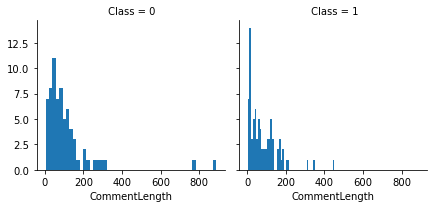

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=df4, col=' Class')
graph.map(plt.hist, 'CommentLength', bins=50)

<AxesSubplot:>

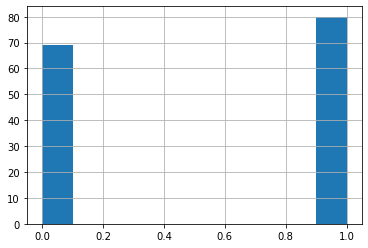

In [30]:
df4[' Class'].hist()



# Data PreProcessing

In [31]:
comment=df4.Comment


In [32]:
## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as reply etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(comment):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    comment_space = comment.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    comment_name = comment_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    comments = comment_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = comments.str.replace("[^a-zA-Z]", " ")
    # remove whitespace with a single space
    newcomment=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newcomment=newcomment.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newcomment=newcomment.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    comment_lower = newcomment.str.lower()
    
    # tokenizing
    tokenized_comment = comment_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_comment=  tokenized_comment.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the commens
    tokenized_comment = tokenized_comment.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_comment)):
        tokenized_comment[i] = ' '.join(tokenized_comment[i])
        comments_p= tokenized_comment
    
    return comments_p

processed_comments = preprocess(comment)   

df4['processed_comments'] = processed_comments
print(df4[["Comment","processed_comments"]].head(10))

                                             Comment  \
0  Ah, English politics. Where everyone hates the...   
1                                              Black   
2                      Tell me your political problm   
3                         Best off luck 2gethr 4ever   
4                                 He  is Indian? OMG   
5                        His accent touched my heart   
6  Deliver this the only word politicians like to...   
7             Lot of talking but no action as usual!   
8     Ritchy WEFƒ??s ƒ??plansƒ?? all come from Klaus   
9              And what do we do with those we have?   

                               processed_comments  
0  ah english polit everyon hate politician equal  
1                                           black  
2                               tell polit problm  
3                            best luck gethr ever  
4                                      indian omg  
5                              accent touch heart  
6                  

In [33]:
#TF-IDF Features-F1
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf5 = tfidf_vectorizer.fit_transform(df4['processed_comments'] )
tfidf5

<149x42 sparse matrix of type '<class 'numpy.float64'>'
	with 305 stored elements in Compressed Sparse Row format>

# Logistic Regression

In [34]:
X2 = tfidf5
y2= df4[' Class'].astype(int)
X_train_tfidf5, X_test_tfidf5, y_train5, y_test5 = train_test_split(X2, y2, random_state=38, test_size=0.3)
model5 = LogisticRegression().fit(X_train_tfidf5,y_train5)
y_preds5 = model5.predict(X_test_tfidf5)
report5 = classification_report( y_test5,y_preds5 )
print(report5)
acc=accuracy_score(y_test5,y_preds5)
print("Logistic Regression, Accuracy Score:",acc)

              precision    recall  f1-score   support

           0       0.59      0.62      0.61        16
           1       0.79      0.76      0.77        29

    accuracy                           0.71        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.72      0.71      0.71        45

Logistic Regression, Accuracy Score: 0.7111111111111111


# Naive Bayes

In [35]:
X_train_tfidf5, X_test_tfidf5, y_train5, y_test5 = train_test_split(X2.toarray(), y2, random_state=42, test_size=0.3)
nb=GaussianNB()
nb.fit(X_train_tfidf5,y_train5)
y_preds5 = nb.predict(X_test_tfidf5)
acc2=accuracy_score(y_test5,y_preds5)
report3 = classification_report( y_test5, y_preds5 )
print(report3)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.55      0.89      0.68        19
           1       0.86      0.46      0.60        26

    accuracy                           0.64        45
   macro avg       0.70      0.68      0.64        45
weighted avg       0.73      0.64      0.63        45

Naive Bayes, Accuracy Score: 0.6444444444444445


# Random Forest

In [36]:
X_train_tfidf5, X_test_tfidf5, y_train5, y_test5 = train_test_split(X2, y2, test_size=0.3)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf5,y_train5)
y_preds5 = rf.predict(X_test_tfidf5)
acc1=accuracy_score(y_test5,y_preds5)
report2 = classification_report( y_test5, y_preds5 )
print(report2)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.57      0.36      0.44        22
           1       0.55      0.74      0.63        23

    accuracy                           0.56        45
   macro avg       0.56      0.55      0.54        45
weighted avg       0.56      0.56      0.54        45

Random Forest, Accuracy Score: 0.5555555555555556


# Support Vector Machine

In [37]:
support =LinearSVC(random_state=20)
support.fit(X_train_tfidf5,y_train5)
y_preds4 = support.predict(X_test_tfidf5)
acc3=accuracy_score(y_test5,y_preds4)
report4 = classification_report( y_test5, y_preds4 )
print(report4)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.67      0.45      0.54        22
           1       0.60      0.78      0.68        23

    accuracy                           0.62        45
   macro avg       0.63      0.62      0.61        45
weighted avg       0.63      0.62      0.61        45

SVM, Accuracy Score: 0.6222222222222222


# LSTM 

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
X = df4['Comment'].values
y = df4[' Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1
max_len = 100
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, y_test, verbose=0)
print(f' Test accuracy: {score[1]}')

acc4 = score[1]

Epoch 1/10
4/4 [==============================] - 3s 95ms/step - loss: 0.6933 - accuracy: 0.4958
Epoch 2/10
4/4 [==============================] - 0s 89ms/step - loss: 0.6926 - accuracy: 0.5210
Epoch 3/10
4/4 [==============================] - 0s 82ms/step - loss: 0.6932 - accuracy: 0.5210
Epoch 4/10
4/4 [==============================] - 0s 102ms/step - loss: 0.6925 - accuracy: 0.5210
Epoch 5/10
4/4 [==============================] - 0s 87ms/step - loss: 0.6930 - accuracy: 0.5210
Epoch 6/10
4/4 [==============================] - 0s 85ms/step - loss: 0.6921 - accuracy: 0.5210
Epoch 7/10
4/4 [==============================] - 0s 83ms/step - loss: 0.6918 - accuracy: 0.5210
Epoch 8/10
4/4 [==============================] - 0s 87ms/step - loss: 0.6915 - accuracy: 0.5210
Epoch 9/10
4/4 [==============================] - 0s 83ms/step - loss: 0.6917 - accuracy: 0.5210
Epoch 10/10
4/4 [==============================] - 0s 83ms/step - loss: 0.6909 - accuracy: 0.5210
 Test accuracy: 0.6666666865

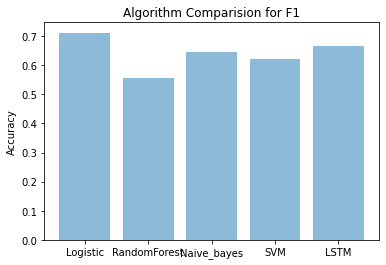

In [39]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM', 'LSTM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3,acc4]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()

# Class Labels For Logistic Regression and LSTM

In [52]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



# Splitting data into training and testing datasets
X2 = tfidf5
y2= df4[' Class'].astype(int)
X_train_tfidf5, X_test_tfidf5, y_train5, y_test5 = train_test_split(X2, y2, random_state=38, test_size=0.3)
model5 = LogisticRegression().fit(X_train_tfidf5,y_train5)
y_preds5 = model5.predict(X_test_tfidf5)
# Converting the predicted class frequency to integers
y_pred = [int(round(x)) for x in y_preds5]

# Calculating individual class frequency
class_freq2 = Counter(y_pred)
print(f"Class frequency: {class_freq2}")

Class frequency: Counter({1: 28, 0: 17})


In [53]:
class_freq2
class_freq2["Hatred"] = class_freq2.pop(0)
class_freq2["Non-Hatred"] = class_freq2.pop(1)

class_freq2

Counter({'Hatred': 17, 'Non-Hatred': 28})

In [54]:
s = sum(class_freq1.values())
for i,j in class_freq1.items():
    print(i +" : "+ str(j/s))

Hatred : 0.3761904761904762
Non-Hatred : 0.6238095238095238


In [55]:
#Class Labels

In [56]:
train_pred = model.predict(X_train)
train_pred_classes = [int(round(x[0])) for x in train_pred]
y_train = panda.Series(y_train)
test_size=0.2

# Count instances per class in training set
class_counts = {}
for i in range(len(train_pred_classes)):
    if i >= len(y_train):
        break
    if y_train.iloc[i] not in class_counts:
        class_counts[y_train.iloc[i]] = 0
    class_counts[y_train.iloc[i]] += 1

# Print class counts
print(f"Class counts for training set with size {1-test_size}:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} ")

4/4 [==============================] - 0s 19ms/step
Class counts for training set with size 0.8:
Class 1: 61 
Class 0: 58 


In [57]:
ls2 = {}
for class_label, count in class_counts.items():
    ls2[class_label] = count
ls2["Hatred"] = ls2.pop(0)
ls2["Non-Hatred"] =ls2.pop(1)

s1 = sum(ls2.values())
for i,j in ls2.items():
    print(i +" : "+ str(j/s1))


Hatred : 0.48739495798319327
Non-Hatred : 0.5126050420168067


# Evaluation of Hatredness using Pie chart

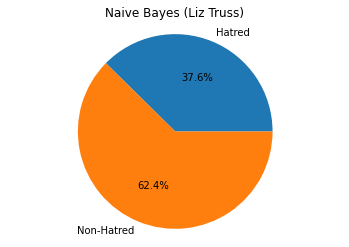

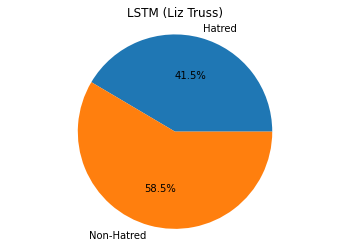

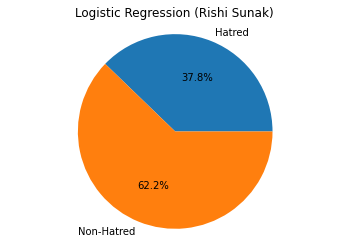

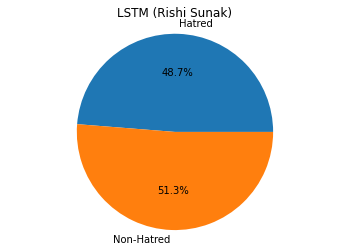

In [59]:
import matplotlib.pyplot as plt

# class counts for each model
model1_class_counts = class_freq1
model2_class_counts = ls
model3_class_counts = class_freq2
model4_class_counts = ls2

# plot pie chart
fig, ax = plt.subplots()
labels = ['Hatred','Non-Hatred']
colors = ['#1f77b4', '#ff7f0e']
ax.pie([model1_class_counts['Hatred'], model1_class_counts['Non-Hatred']],  labels=labels, colors=colors, autopct='%1.1f%%' )
ax.set_title('Naive Bayes (Liz Truss)')
ax.axis('equal')

fig, ax = plt.subplots()
ax.pie([model2_class_counts['Hatred'], model2_class_counts['Non-Hatred']],  labels=labels, colors=colors, autopct='%1.1f%%')
ax.set_title('LSTM (Liz Truss)')
ax.axis('equal')

fig, ax = plt.subplots()
ax.pie([model3_class_counts['Hatred'], model3_class_counts['Non-Hatred']],  labels=labels, colors=colors, autopct='%1.1f%%')
ax.set_title('Logistic Regression (Rishi Sunak)')
ax.axis('equal')

fig, ax = plt.subplots()
ax.pie([model4_class_counts['Hatred'], model4_class_counts['Non-Hatred']],  labels=labels, colors=colors, autopct='%1.1f%%')
ax.set_title('LSTM (Rishi Sunak)')
ax.axis('equal')

plt.show()
